# Proyecto Localización de complejos-k en el EEG del sueño

Integrantes: Fernando Palma, Agustín Salgado

**Importante:** Crear carpeta en tu drive llamada "proyectoint" e introducir el archivo ss2kc.csv, el cual se puede conseguir desde este link: https://drive.google.com/drive/folders/1gtz4UnQR5RCCSEfmzSm1TXptYwtHZ5S7?usp=sharing

In [ ]:
# Montar el Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import ast

# Ruta de entrada (CSV en tu Drive)
ruta = '/content/drive/MyDrive/proyectoint/'

# Leer el CSV
df = pd.read_csv(ruta + "ss2kc.csv", low_memory=False)

# Convertir las columnas que son listas almacenadas como strings
df["signal"] = df["signal"].apply(ast.literal_eval)
df["labels"] = df["labels"].apply(ast.literal_eval)

# Guardar a parquet (dentro de la misma carpeta o en /content)
df.to_parquet(ruta + "ss2kc.parquet", engine="pyarrow", compression="snappy")

print("✅ Conversión terminada: ss2kc.parquet creado.")


Mounted at /content/drive
✅ Conversión terminada: ss2kc.parquet creado.


Si ya se tiene el ss2kc.parquet se puede partir desde aquí

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/proyectoint/'

import pandas as pd

df = pd.read_parquet(ruta + "ss2kc.parquet")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Entender base de datos

In [ ]:
df.head()

,subject_id,signal,init_sec,labels
0,01-02-0001,"[0.8642647230320131, -1.3254061324679178, -2.0...",1280.76108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,01-02-0001,"[19.979204735578016, 24.564032163729603, 27.49...",1300.76108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,01-02-0001,"[-0.6234027275576637, 1.0729096011331865, 2.46...",1320.76108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,01-02-0001,"[1.52619980314834, 3.8336439275996477, 5.85130...",1340.76108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,01-02-0001,"[2.417046285089186, 1.2075578435732488, -0.733...",1360.76108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


la celda de aqui abajo era para veriguar como cargar los vectores de signal y labels, habia que cargarlos con su respectivo tipo de datos para confirmar que tuvieran el mismo largo. Si no se hace lo anterior se carga como una string gigante

In [ ]:
#import ast
"""
# pick first row
a = df.iloc[0]

# load the signal of a as a vector of floats
a_signal = list(map(float, ast.literal_eval(a["signal"])))

# load the labels of a as a vector of ints
a_labels = list(map(int, ast.literal_eval(a["labels"])))

# show size of each vector
print("Signal length:", len(a_signal))
print("Labels length:", len(a_labels))

print(a_signal)

print(a_labels)"""

a = df.iloc[0]
a_signal = a["signal"]
a_labels = a["labels"]

print("Signal length:", len(a_signal))
print("Labels length:", len(a_labels))

Signal length: 4000
Labels length: 4000


**subject_id** es el identificador único del paciente o sujeto del cual proviene el segmento de señal EEG, permitiendo organizar y diferenciar los registros por persona o sesión.

**signal** corresponde a una ventana temporal de la señal EEG representada como un vector de valores numéricos que indican la amplitud de la actividad cerebral en cada punto de muestreo.

**init_sec** indica el tiempo exacto en segundos en que comienza el segmento de señal dentro de la grabación completa, lo que permite ubicarlo cronológicamente en la polisomnografía.

**labels** es un vector binario paralelo a la señal que marca con 1 la presencia de un complejo-K en cada muestra y con 0 la ausencia, funcionando como las etiquetas para el entrenamiento supervisado.






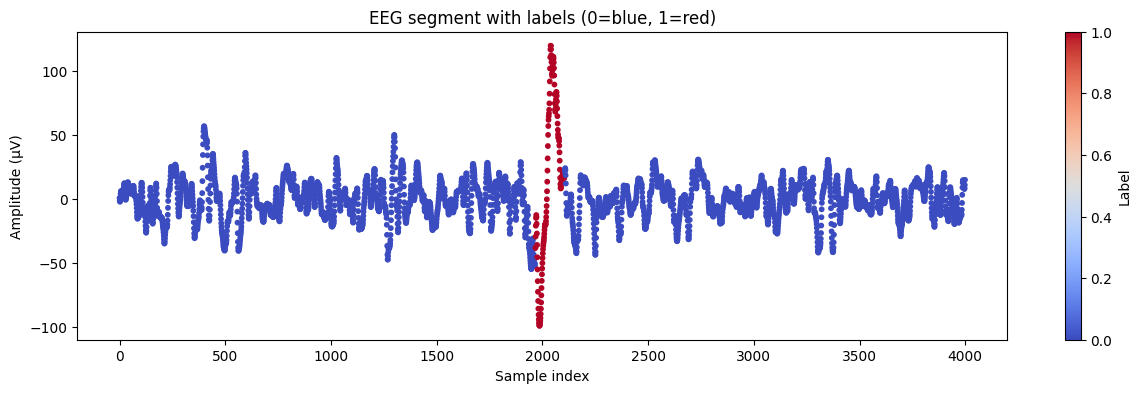

In [ ]:
import matplotlib.pyplot as plt

# eje x = índices de las muestras
x = range(len(a_signal))

plt.figure(figsize=(15, 4))
scatter = plt.scatter(x, a_signal, c=a_labels, cmap="coolwarm", s=10)

plt.title("EEG segment with labels (0=blue, 1=red)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude (µV)")
plt.colorbar(scatter, label="Label")
plt.show()


El grafico de arriba nos permite apreciar como es un complejo k y el objetivo de todo el proyecto.

#### Adicionales para confirmar

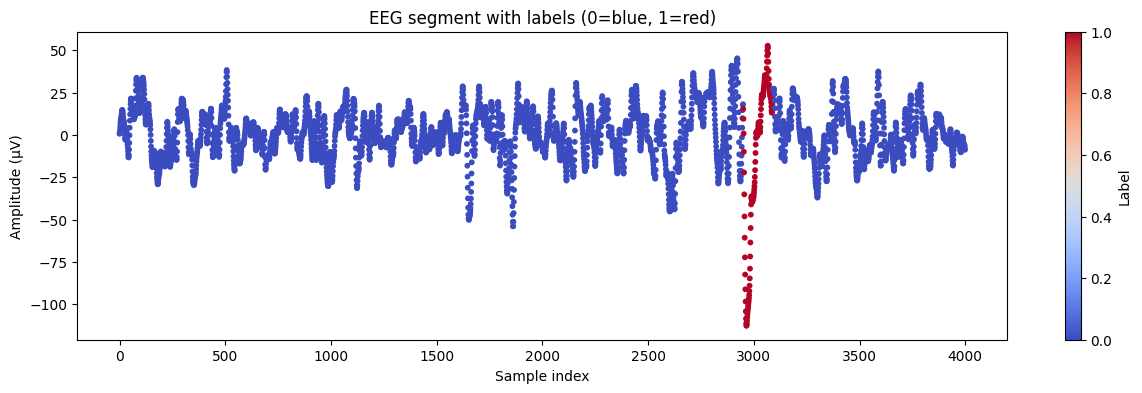

In [ ]:
# repeat same process as above with another row
b = df.iloc[100]
b_signal = b["signal"]
b_labels = b["labels"]

import matplotlib.pyplot as plt

# eje x = índices de las muestras
x = range(len(b_signal))

plt.figure(figsize=(15, 4))
scatter = plt.scatter(x, b_signal, c=b_labels, cmap="coolwarm", s=10)

plt.title("EEG segment with labels (0=blue, 1=red)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude (µV)")
plt.colorbar(scatter, label="Label")
plt.show()

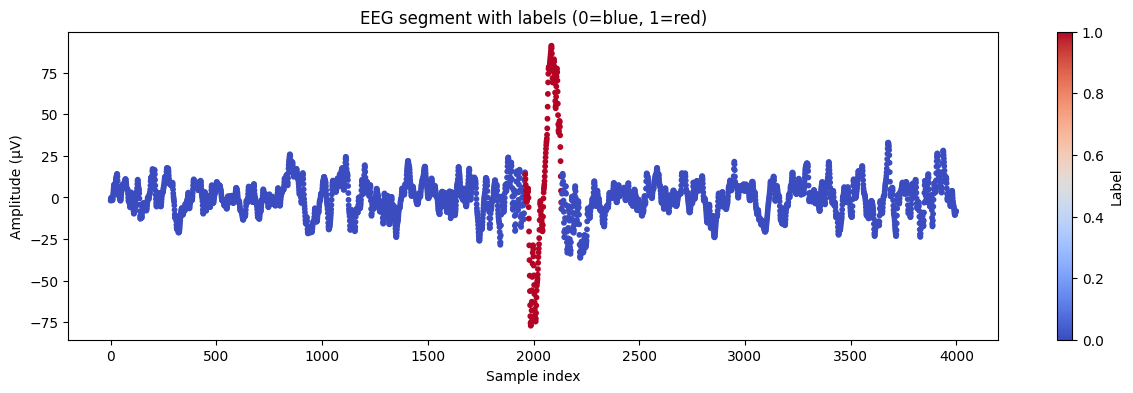

In [ ]:
# repeat same process as above with another row
b = df.iloc[600]
b_signal = b["signal"]
b_labels = b["labels"]

import matplotlib.pyplot as plt

# eje x = índices de las muestras
x = range(len(b_signal))

plt.figure(figsize=(15, 4))
scatter = plt.scatter(x, b_signal, c=b_labels, cmap="coolwarm", s=10)

plt.title("EEG segment with labels (0=blue, 1=red)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude (µV)")
plt.colorbar(scatter, label="Label")
plt.show()

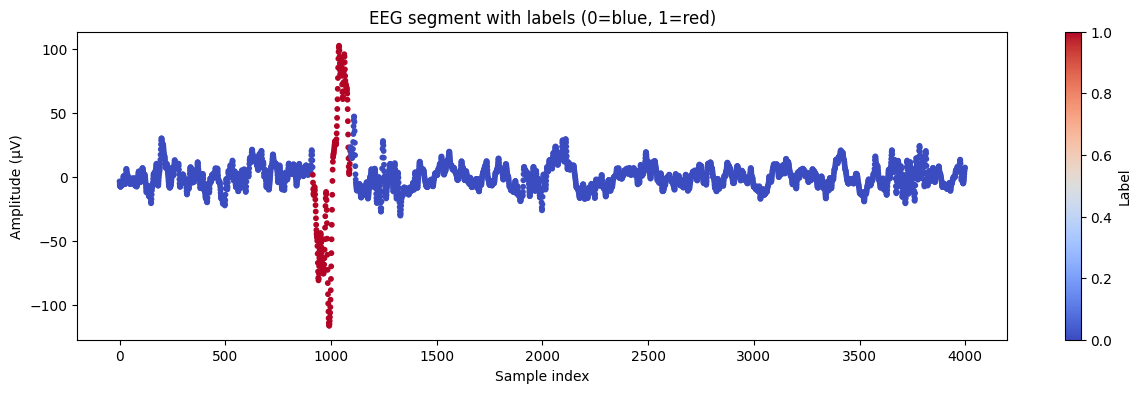

In [ ]:
# repeat same process as above with another row
b = df.iloc[67]
b_signal = b["signal"]
b_labels = b["labels"]

import matplotlib.pyplot as plt

# eje x = índices de las muestras
x = range(len(b_signal))

plt.figure(figsize=(15, 4))
scatter = plt.scatter(x, b_signal, c=b_labels, cmap="coolwarm", s=10)

plt.title("EEG segment with labels (0=blue, 1=red)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude (µV)")
plt.colorbar(scatter, label="Label")
plt.show()

## Pequeño marco teórico (consultas a Gemini 2.5 Pro)

¿Qué es un Complejo-K? 🧠

Un Complejo-K es un evento cerebral visible en el EEG que ocurre principalmente durante la fase N2 del sueño. Se define por su forma característica: una onda negativa (hacia arriba) de alta amplitud, seguida inmediatamente por una onda positiva (hacia abajo) más lenta. Su duración total debe ser de al menos 0.5 segundos. Se cree que su función es mantener el sueño al suprimir estímulos que podrían despertarnos y ayudar en la consolidación de la memoria.

### Especificaciones Técnicas del Complejo-K

#### Morfología y Componentes de la Onda

Un complejo-K es un grafoelemento bien definido que debe destacar del EEG de fondo.  
Su morfología clásica es **bifásica**, compuesta por dos partes principales:

##### Componente Negativa Inicial
- **Forma:** Una deflexión negativa (visible como un pico agudo hacia arriba en la mayoría de los montajes de EEG) que es clara y de pendiente pronunciada.  
- **Duración de la componente:** Típicamente entre **100 y 200 ms**.

##### Componente Positiva Lenta
- **Forma:** Inmediatamente después del pico negativo, sigue una onda lenta y de alta amplitud en la dirección positiva (hacia abajo).  
- **Duración de la componente:** Generalmente más prolongada, contribuyendo a la duración total del complejo.

---

#### Criterios Cuantitativos: Tiempo y Amplitud

##### Duración Total
- **Rango mínimo:** La duración total del complejo-K, desde el inicio de la deflexión negativa hasta el final de la componente positiva, debe ser de al menos **0.5 s (500 ms)**.  
- **Rango típico:** Aunque el mínimo es 0.5 s, la mayoría de los complejos-K duran entre **500 ms y 1000 ms (1 s)**.

##### Amplitud (Voltaje)
- **Variación sobre el fondo:** Un complejo-K es un evento de alto voltaje. Su amplitud pico a pico (desde el máximo de la onda negativa hasta el mínimo de la positiva) debe superar claramente la amplitud del EEG de fondo.  
- **Rango típico:** No hay un valor absoluto estandarizado en microvoltios (μV) que se aplique a todos los pacientes, ya que depende del voltaje general del EEG de cada individuo.  
  Como referencia, es común observar amplitudes pico a pico que exceden los **75–100 μV**.  
  La clave es que sea el evento de mayor amplitud en la época de sueño N2, excluyendo artefactos.

---

#### Contexto y Características Adicionales

- **Frecuencia de aparición:** Se observan principalmente en la fase **N2 del sueño**. Pueden ocurrir de forma espontánea o en respuesta a estímulos sensoriales (auditivos, táctiles).  
- **Localización topográfica:** Son más prominentes en las regiones **frontales y centrales** del cerebro (electrodos Fz, Cz). Suelen tener una distribución sincrónica y generalizada.  
- **Asociación con husos de sueño (spindles):** Es muy común que un complejo-K esté inmediatamente seguido o superpuesto por un huso de sueño (una ráfaga de actividad en el rango de **11–16 Hz**).  
  La presencia de un huso de sueño asociado refuerza la identificación del complejo-K.

---

#### Resumen para Detección Algorítmica

1. Buscar una onda bifásica (negativa–positiva).  
2. Validar una duración total **≥ 500 ms**.  
3. Confirmar que su amplitud destaque significativamente sobre la actividad EEG circundante.  
4. (Opcional, recomendado): Asignar mayor probabilidad si se detecta en los canales **fronto-centrales** y/o si está asociado a un **huso de sueño**.

## Pre-procesamiento de Datos

In [ ]:
# Convert column 2 (floats)
#df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: list(map(float, ast.literal_eval(x))))

# Convert column 4 (ints)
#df.iloc[:, 3] = df.iloc[:, 3].apply(lambda x: list(map(int, ast.literal_eval(x))))

In [ ]:
# Column 2 (floats)
col2_lengths = df.iloc[:, 1].apply(len)
print("Column 2 - all 4000?", (col2_lengths == 4000).all())

# Column 4 (ints)
col4_lengths = df.iloc[:, 3].apply(len)
print("Column 4 - all 4000?", (col4_lengths == 4000).all())

# Show any bad rows
bad_rows = df[(col2_lengths != 4000) | (col4_lengths != 4000)]
print("Bad rows:")
print(bad_rows)

Column 2 - all 4000? True
Column 4 - all 4000? True
Bad rows:
Empty DataFrame
Columns: [subject_id, signal, init_sec, labels]
Index: []


## Definición de cosas

Como en verdad solo tenemos que detectar peaks en una serie de tiempo de una dimensión, se probara primero con una red CNN simple.

In [ ]:
# for each sginal and label count lenght
